# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
rm(list = ls())   # erase everything, start from scratch!

# load the data from package funFEM

library(funFEM)
data(velib)
#help("velib")

Loading required package: MASS

Loading required package: fda

Loading required package: splines

Loading required package: Matrix

Loading required package: fds

Loading required package: rainbow

Loading required package: pcaPP

Loading required package: RCurl


Attaching package: 'fda'


The following object is masked from 'package:graphics':

    matplot


Loading required package: elasticnet

Loading required package: lars

Loaded lars 1.2




In [2]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

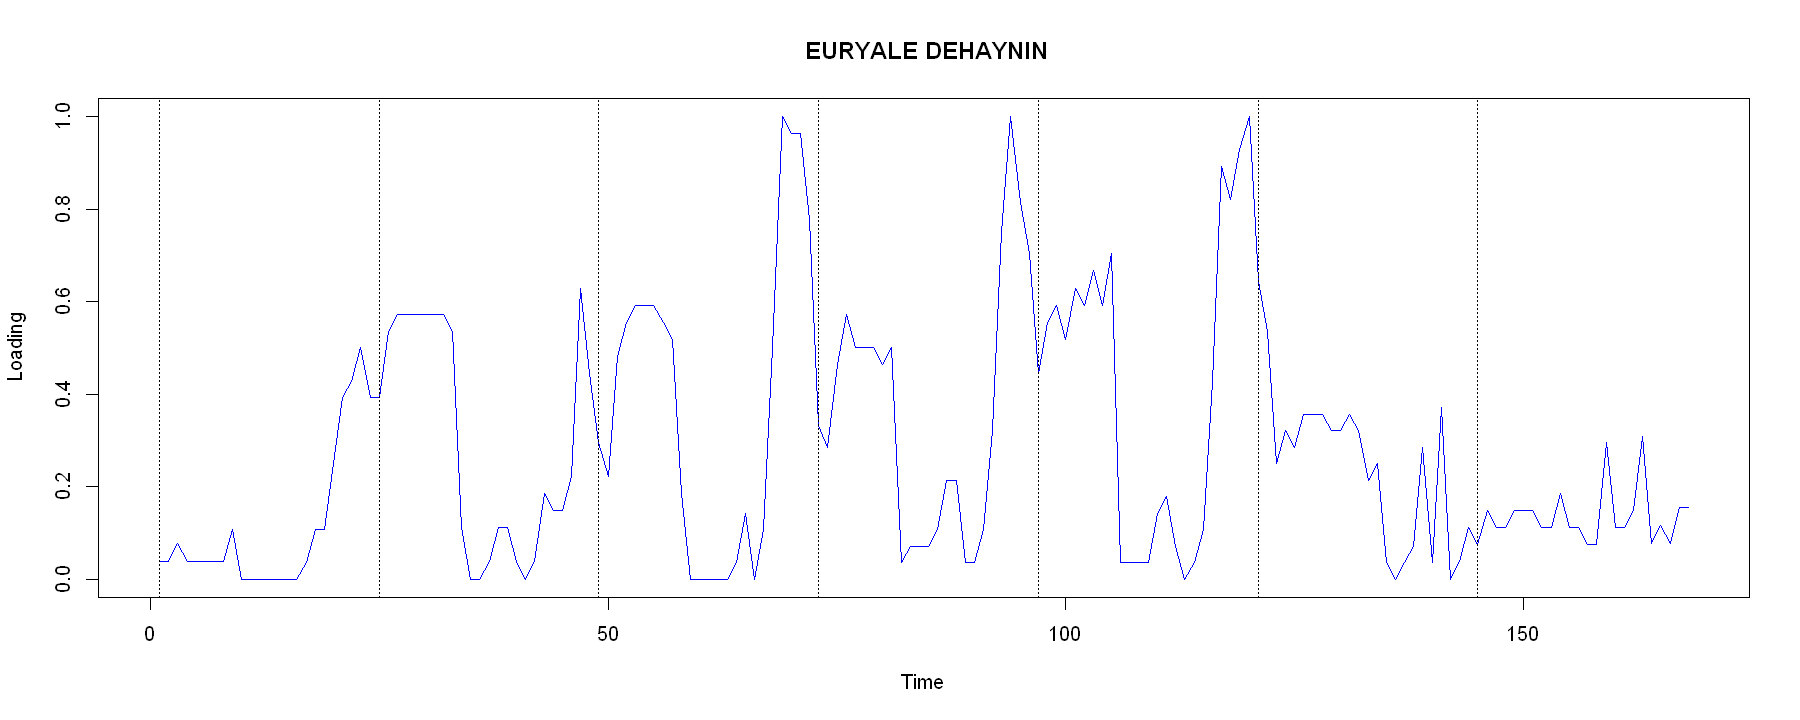

In [3]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))

options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?
3. Investigate the temporal correlation of the variables. 
For instance, for a given station, plot the loading at t+h versus loading at time t.
Visualize the correlation matrix by an image plot. Interpret the result.
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use a different color for stations which are located on a hill.
5. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

# Principal component analysis

Some ideas :

1. Perform a PCA with package FactoMineR. Should the data be scaled?
2. Plot the percentage of variance explained by the first 15 components, as well as a boxplot of the coordinates of the individuals on the 15 first principal axis. How many components can be kept?
3. Plot the coordinates of the first 4 principal components on different graphs. Interpret the result (remember that the original variables are time steps).
4. Plot the circle of correlation. Interpret the result.
5. Plot the individuals on the plan spanned by the first two coordinates. Interpret the result.
6. Add the information brought by the variable qualitative variable 'bonus', indicating whether a station is located on a hill or not. In particular, where are located these stations on the graph of individuals? Is it surprising?
7. Implement questions 1-6 in Python. For that, you can have a look at the notebook on MARS, of https://github.com/wikistat/Exploration/

In [4]:
library(FactoMineR)
library(factoextra)

velib.pca <- PCA(x, scale.unit=F, graph=F)
print(velib.pca)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 1189 individuals, described by 168 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard erro

In [5]:
vp <- get_eig(velib.pca)[1:15,]
print(vp)

       eigenvalue variance.percent cumulative.variance.percent
Dim.1   7.9730841       40.0716665                    40.07167
Dim.2   4.8089597       24.1691954                    64.24086
Dim.3   1.0215417        5.1341333                    69.37500
Dim.4   0.8574387        4.3093735                    73.68437
Dim.5   0.6236212        3.1342376                    76.81861
Dim.6   0.3739460        1.8794034                    78.69801
Dim.7   0.3280678        1.6488254                    80.34684
Dim.8   0.3134050        1.5751322                    81.92197
Dim.9   0.2507254        1.2601126                    83.18208
Dim.10  0.2283967        1.1478914                    84.32997
Dim.11  0.1967198        0.9886876                    85.31866
Dim.12  0.1697341        0.8530610                    86.17172
Dim.13  0.1614512        0.8114323                    86.98315
Dim.14  0.1418894        0.7131171                    87.69627
Dim.15  0.1401836        0.7045444                    8

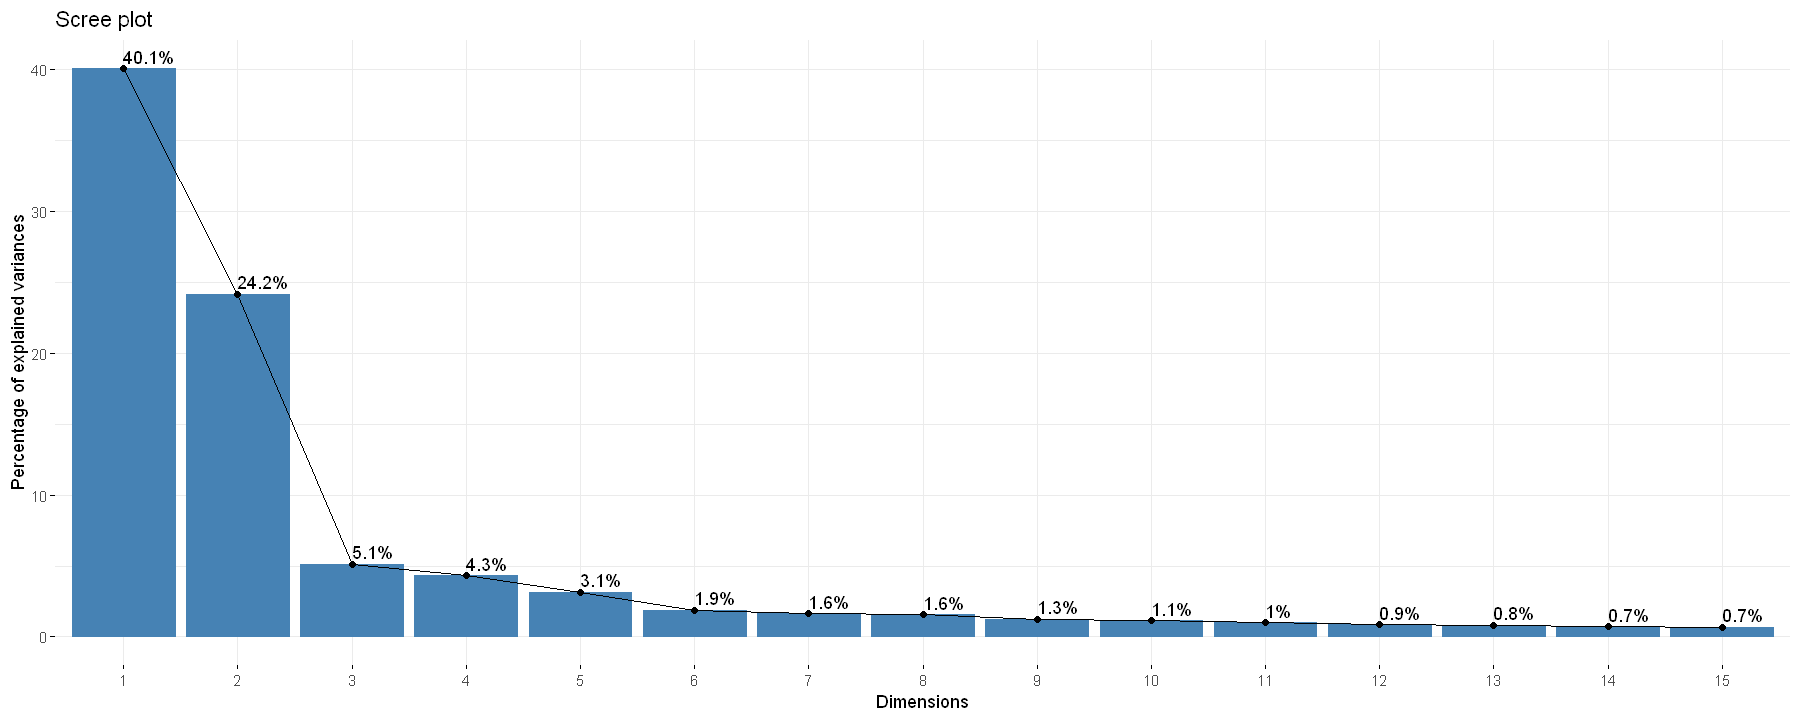

In [6]:
ncp <- 15 # number of components to be shown
fviz_eig(velib.pca, addlabels=T, choice="variance", ncp=ncp)

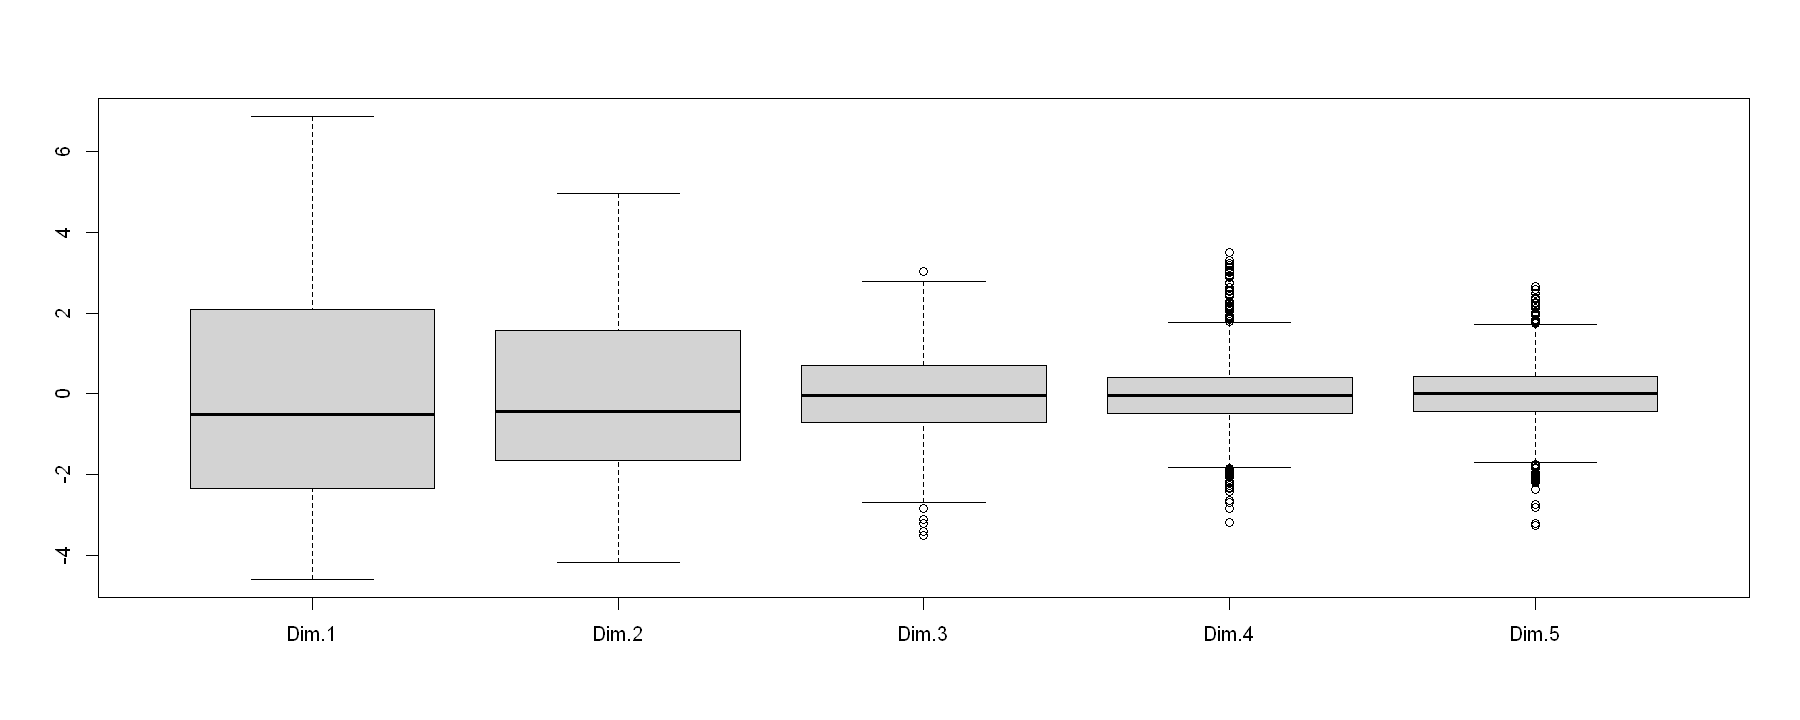

In [7]:
boxplot(velib.pca$ind$coord)

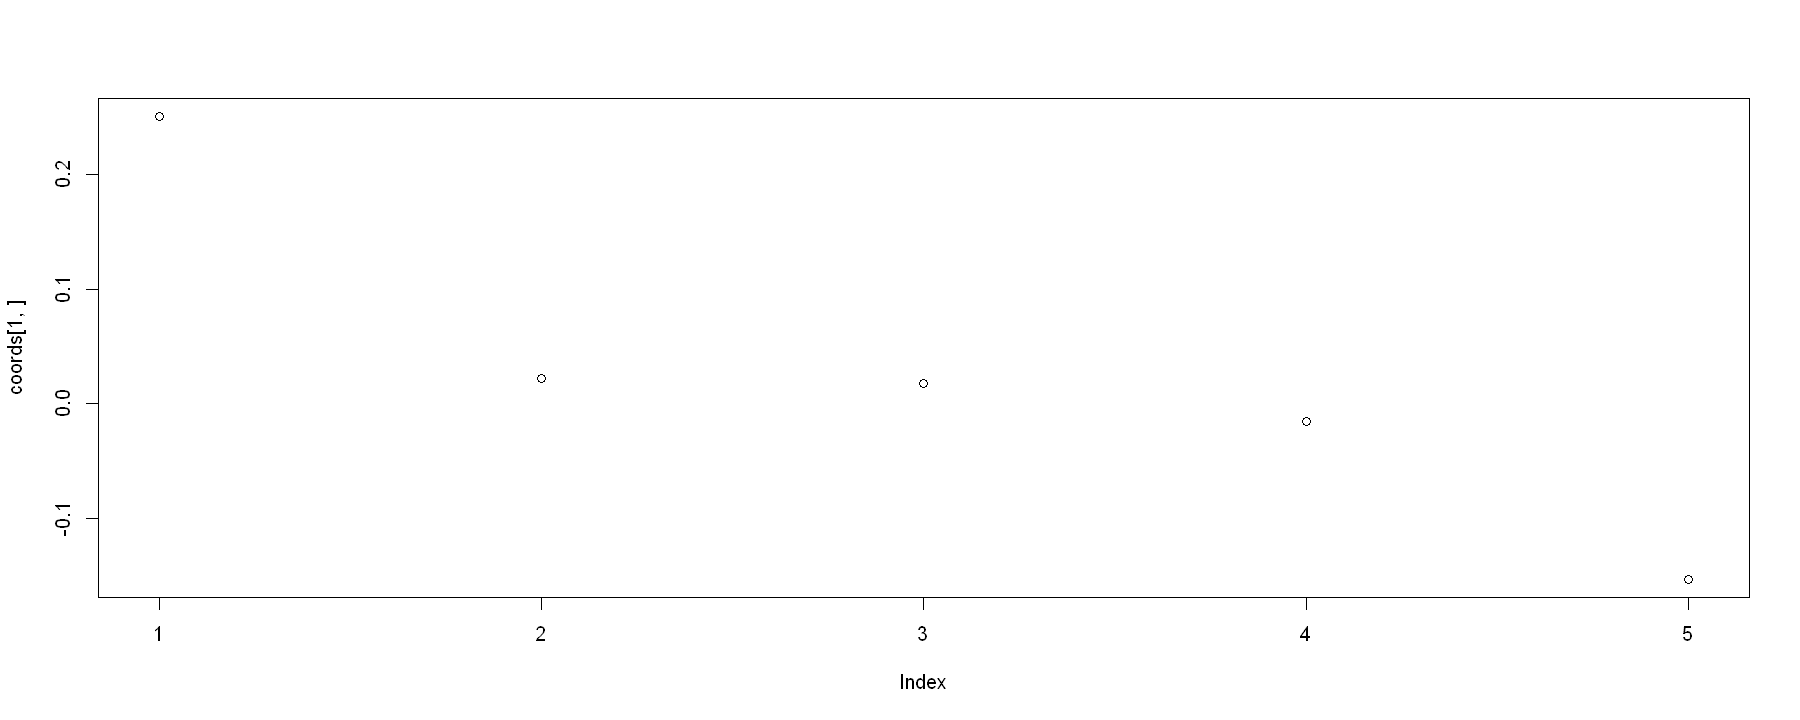

In [8]:
coords <- get_pca_var(velib.pca)$coord
plot(coords[1,])

Warning message:
"ggrepel: 1188 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


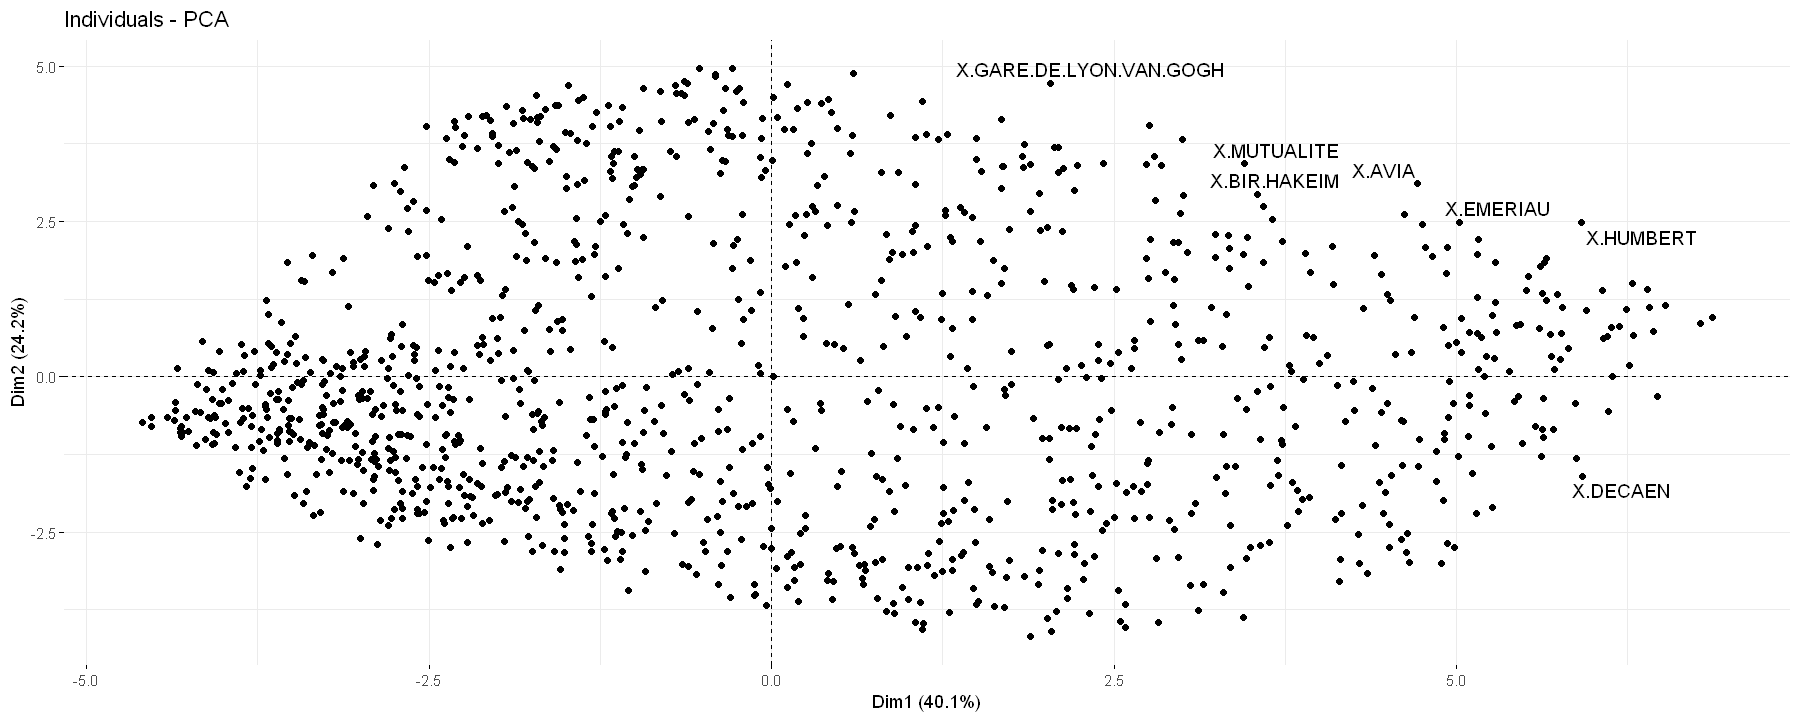

In [9]:
fviz_pca_ind(velib.pca, axes=c(1, 2), repel=T)

In [10]:
#plot(velib.pca, axes=c(1, 2), choix='ind', repel=T)

Warning message:
"ggrepel: 71 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


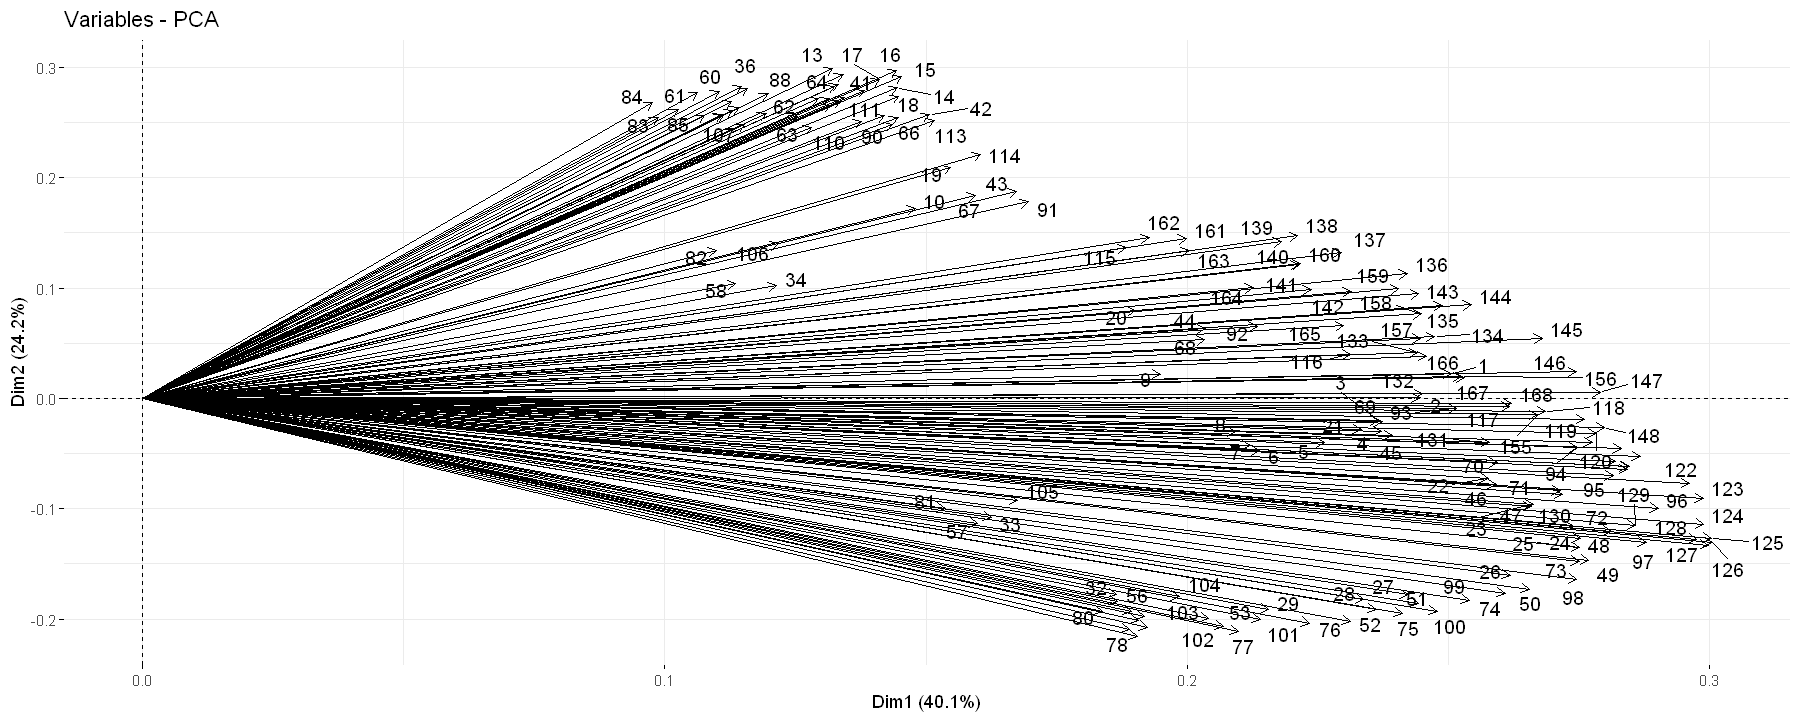

In [11]:
fviz_pca_var(velib.pca, repel=T)